receiving incremental file list
data.json
        332,038 100%  158.33MB/s    0:00:00 (xfr#1, to-chk=0/1)

sent 2,671 bytes  received 18,504 bytes  8,470.00 bytes/sec
total size is 332,038  speedup is 15.68


,humidity,temperature,timestamp
4482,52.0,26.0,2018-02-05 23:15:00
4483,52.0,26.0,2018-02-05 23:20:00
4484,52.0,26.0,2018-02-05 23:25:00
4485,53.0,26.0,2018-02-05 23:30:00
4486,53.0,26.0,2018-02-05 23:35:00


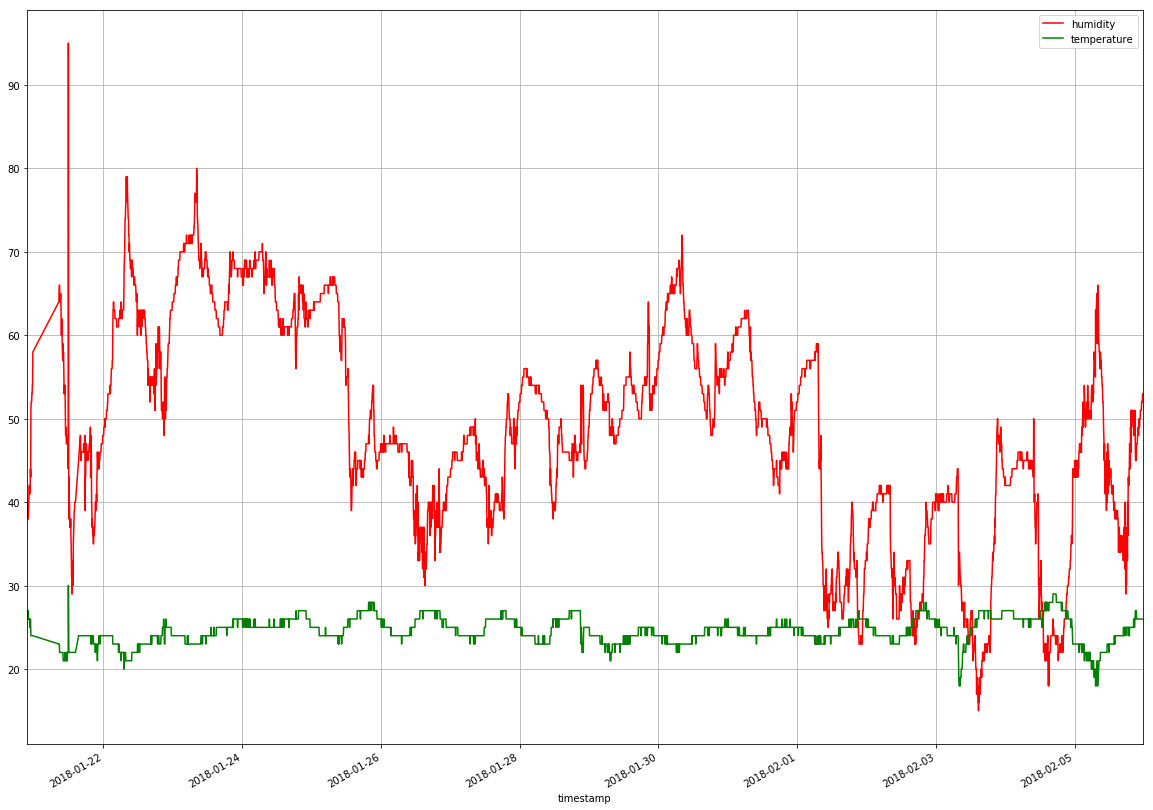

In [1]:
!rsync -avzP vinay@rpi0-01:/home/vinay/scripts/crons/tempmon/data.json .
import json
import pandas as pd
import datetime

%matplotlib inline

with open("data.json") as f:
    data = json.loads(f.read())

df = pd.DataFrame(data)
df["timestamp"] = [datetime.datetime.strptime(t, "%Y-%m-%d %H:%M") for t in df["timestamp"]]
ax = df.plot(x="timestamp", y=["humidity", "temperature"], color= ["r", "g"], figsize=(20,15), grid=True)
# xtick_frequency = int(len(df["timestamp"]) / 10)

# xticks = ax.set_xticks(list(range(0, len(df["timestamp"]), xtick_frequency)))
#xticklabels = ax.set_xticklabels([x for i, x in enumerate(df["timestamp"]) if i%xtick_frequency == 0], rotation=90)
df.tail()

In [2]:
df.tail(n=4*288).describe()

,humidity,temperature
count,1152.000000,1152.000000
mean,37.031250,24.900174
std,9.869209,2.043727
min,15.000000,18.000000
25%,28.000000,24.000000
50%,39.000000,25.000000
75%,44.000000,26.000000
max,66.000000,29.000000


In [14]:
df.tail(n=3*288).describe()

,humidity,temperature
count,864.000000,864.000000
mean,33.895833,25.446759
std,8.402575,1.658418
min,15.000000,18.000000
25%,26.000000,24.000000
50%,35.000000,26.000000
75%,41.000000,27.000000
max,50.000000,29.000000


In [15]:
df.tail(n=2*288).describe()

,humidity,temperature
count,576.000000,576.000000
mean,34.430556,25.788194
std,9.283667,1.781138
min,15.000000,18.000000
25%,24.000000,25.000000
50%,38.000000,26.000000
75%,42.000000,27.000000
max,50.000000,29.000000


In [16]:
df.tail(n=288).describe()

,humidity,temperature
count,288.000000,288.000000
mean,36.996528,26.631944
std,9.493992,0.908700
min,18.000000,25.000000
25%,26.000000,26.000000
50%,42.000000,26.000000
75%,45.000000,27.000000
max,50.000000,29.000000
